## Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/Datasets/Handwritten.csv.zip

Archive:  gdrive/My Drive/Datasets/Handwritten.csv.zip
replace A_Z Handwritten Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: A_Z Handwritten Data.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

In [ ]:
df = pd.read_csv("A_Z Handwritten Data.csv")
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.rename(columns={'0':'target'}, inplace=True)
df.head()

,target,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['target'].value_counts()

14    57825
18    48419
20    29008
2     23409
19    22495
15    19341
13    19010
0     13869
12    12336
11    11586
17    11566
4     11440
24    10859
22    10784
3     10134
1      8668
9      8493
7      7218
23     6272
25     6076
16     5812
6      5762
10     5603
21     4182
5      1163
8      1120
Name: target, dtype: int64

In [ ]:
X = df.drop('target',axis = 1)
y = df['target']

print(X.shape)
print(y.shape)

(372450, 784)
(372450,)


##Split into Training and Testing

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

standard_scaler = MinMaxScaler()
standard_scaler.fit(x_train)

# scaling data
x_train = standard_scaler.transform(x_train)
x_test = standard_scaler.transform(x_test)

# One hot encoding targets
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(297960, 784)
(74490, 784)
(297960, 26)
(74490, 26)


In [ ]:
#no. of features per data sample
x_train.shape[1]

784

In [ ]:
#total targets
len(y.unique())

26

## Create ANN Model

In [ ]:
# creating ANN model

model = keras.Sequential()
model.add(layers.Dense(500, activation="relu" , input_dim = x_train.shape[1]))
model.add(layers.Dense(400, activation="relu"))
model.add(layers.Dense(300, activation="relu"))
model.add(layers.Dense(200, activation="relu"))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(len(y.unique()), activation="softmax"))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="adam" , metrics = ['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 400)               200400    
                                                                 
 dense_2 (Dense)             (None, 300)               120300    
                                                                 
 dense_3 (Dense)             (None, 200)               60200     
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 26)                2626      
                                                                 
Total params: 796,126
Trainable params: 796,126
Non-trai

In [ ]:
model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test))

Epoch 1/10
9312/9312 [==============================] - 130s 14ms/step - loss: 0.2227 - acc: 0.9368 - val_loss: 0.1434 - val_acc: 0.9602
Epoch 2/10
9312/9312 [==============================] - 126s 14ms/step - loss: 0.1115 - acc: 0.9695 - val_loss: 0.0980 - val_acc: 0.9738
Epoch 3/10
9312/9312 [==============================] - 127s 14ms/step - loss: 0.0855 - acc: 0.9767 - val_loss: 0.0982 - val_acc: 0.9764
Epoch 4/10
9312/9312 [==============================] - 125s 13ms/step - loss: 0.0756 - acc: 0.9801 - val_loss: 0.0897 - val_acc: 0.9770
Epoch 5/10
9312/9312 [==============================] - 129s 14ms/step - loss: 0.0667 - acc: 0.9826 - val_loss: 0.0976 - val_acc: 0.9774
Epoch 6/10
9312/9312 [==============================] - 127s 14ms/step - loss: 0.0603 - acc: 0.9848 - val_loss: 0.0944 - val_acc: 0.9792
Epoch 7/10
9312/9312 [==============================] - 126s 13ms/step - loss: 0.0571 - acc: 0.9855 - val_loss: 0.0800 - val_acc: 0.9831
Epoch 8/10
9312/9312 [===================

## Make predictions

In [ ]:
model.evaluate(x_test,y_test)

2328/2328 [==============================] - 12s 5ms/step - loss: 0.1124 - acc: 0.9801


[0.1124226525425911, 0.9801046848297119]

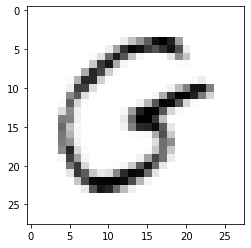

In [ ]:
# original target
plt.imshow(x_test[150].reshape(28,28), cmap='Greys')
plt.show()

In [ ]:
# predicted target
test_pred = model.predict(x_test[150].reshape(1,784))
chr(np.argmax(test_pred)+65)

'G'